# [CDAF] Atividade 2

## Nome e matrícula
Nome: Arthur Pontes Nader
Matrícula: 2019022294

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [16]:
df = pd.read_csv('sportsref_download.csv')
df.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,22855.0,Estadio Jornalista Mário Filho,Anderson Daronco,Match Report,NaN
1,1.0,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,10496.0,Estádio Antônio Accioly,Braulio da Silva Machado,Match Report,NaN
2,1.0,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,17788.0,Estádio Major Antônio Couto Pereira,Raphael Claus,Match Report,NaN
3,1.0,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,37531.0,Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,Match Report,NaN
4,1.0,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,36898.0,Estádio Nilton Santos,Wilton Sampaio,Match Report,NaN


In [17]:
df_aux = df[["Home", "Away", "xG", "xG.1"]].copy()
df_aux["dif. xG"] = df_aux["xG"] - df_aux["xG.1"]
df_aux.head()

,Home,Away,xG,xG.1,dif. xG
0,Fluminense,Santos,1.6,0.1,1.5
1,Atl Goianiense,Flamengo,1.4,1.2,0.2
2,Coritiba,Goiás,1.7,0.4,1.3
3,Atlético Mineiro,Internacional,1.9,0.6,1.3
4,Botafogo (RJ),Corinthians,1.5,2.1,-0.6


In [18]:
def calcular_media_movel(df, time, janela_media_movel=5):
    
    resultados_time = df[(df["Home"] == time) | (df["Away"] == time)].copy()
    
    for i, linha in resultados_time.iterrows():
        
        if linha["Away"] == time:
            
            xg_time = linha["xG.1"]
            xg_outro = linha["xG"]
            
            resultados_time.loc[i, "Home"] = time
            resultados_time.loc[i, "xG"] = xg_time
            resultados_time.loc[i, "xG.1"] = xg_outro
            resultados_time.loc[i, "dif. xG"] *= -1
    
    resultados_time = resultados_time.rename(columns={'Home': 'Time'})
    resultados_time = resultados_time.drop("Away", axis = 1)
    
    media_movel_xg = resultados_time["xG"].rolling(window=janela_media_movel, min_periods=1).mean().values
    media_movel_xg1 = resultados_time["xG.1"].rolling(window=janela_media_movel, min_periods=1).mean().values
    media_movel_dif = resultados_time["dif. xG"].rolling(window=janela_media_movel, min_periods=1).mean().values
    
    return {"time": time, 
            "media_movel_xg": media_movel_xg, 
            "media_movel_xg1": media_movel_xg1, 
            "media_movel_dif": media_movel_dif}

In [19]:
medias = pd.DataFrame(columns=["time", "media_movel_xg", "media_movel_xg1", "media_movel_dif"])
for time in df_aux["Home"].unique():
    medias = medias.append(calcular_media_movel(df_aux, time), ignore_index=True)

Visualização das medias

In [20]:
df_camp = df[["Wk", "xG", "xG.1"]].copy()
df_camp["dif. xG"] = df_camp["xG"] - df_camp["xG.1"]
df_camp = df_camp.groupby(df_camp['Wk']).mean()

medias = medias.append({"time": "Campeonato", 
                        "media_movel_xg": df_camp["xG"].rolling(window=5, min_periods=1).mean(), 
                        "media_movel_xg1": df_camp["xG.1"].rolling(window=5, min_periods=1).mean(), 
                        "media_movel_dif": df_camp["dif. xG"].rolling(window=5, min_periods=1).mean()}, ignore_index=True)

In [21]:
def mostrar_serie(medias, times, estatistica):
    
    
    plt.figure(figsize=(14, 6))
    
    for time in times:
        dados = medias[medias["time"] == time]          
        plt.plot((dados[estatistica].values[0]))
    
    dados = medias[medias["time"] == "Campeonato"]          
    plt.plot((dados[estatistica].values[0]), linestyle='dashed')
    plt.legend(times + ["Campeonato"])
    plt.xlabel("Rodada", fontsize = 12)
    plt.ylabel(estatistica, fontsize = 12)
    plt.title(estatistica + " por rodada\n", fontsize = 16)
    plt.show()

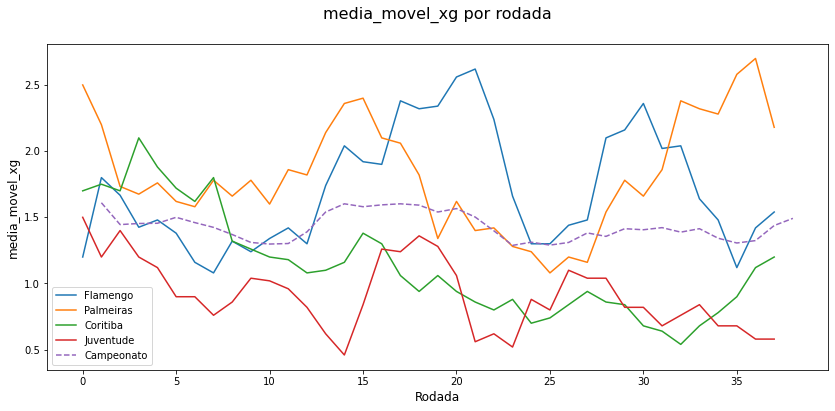

In [22]:
mostrar_serie(medias, ["Flamengo", "Palmeiras", "Coritiba", "Juventude"], "media_movel_xg")

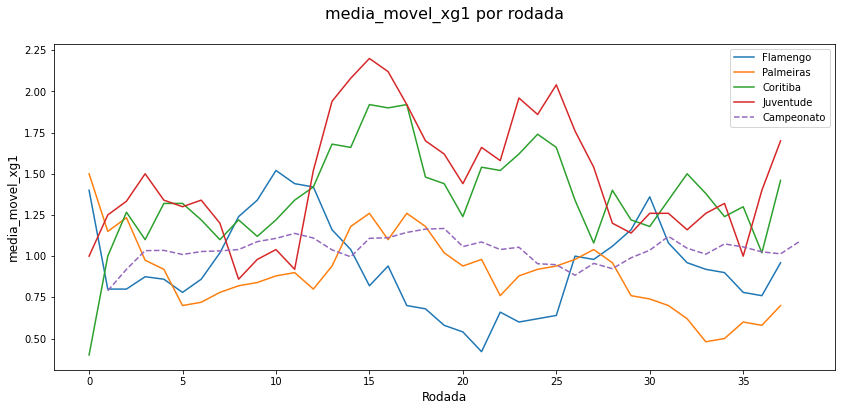

In [23]:
mostrar_serie(medias, ["Flamengo", "Palmeiras", "Coritiba", "Juventude"], "media_movel_xg1")

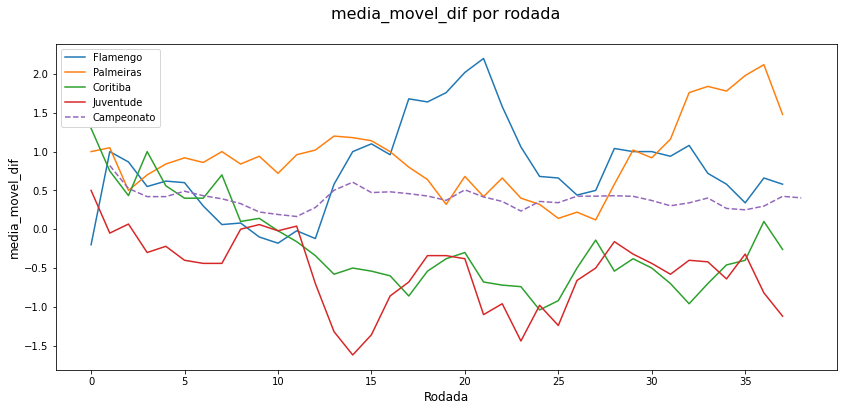

In [24]:
mostrar_serie(medias, ["Flamengo", "Palmeiras", "Coritiba", "Juventude"], "media_movel_dif")

Pelos resultados obtidos, pode-se perceber que o Flamengo e o Palmeiras possuem maior qualidade ofensiva e defensiva, ficando acima da média de gols esperados e abaixo da média de gols levados esperados na maioria das rodadas do campeonato. Já Juventude e Coritiba foram o oposto disso, o que revela a pior qualidade ofensiva e defensiva desses times.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela à outra?

In [25]:
medias10 = pd.DataFrame(columns=["time", "media_movel_xg", "media_movel_xg1", "media_movel_dif"])
for time in df_aux["Home"].unique():
    medias10 = medias10.append(calcular_media_movel(df_aux, time, 10), ignore_index=True)

In [26]:
medias10 = medias10.append({"time": "Campeonato", 
                        "media_movel_xg": df_camp["xG"].rolling(window=10,  min_periods=1).mean(), 
                        "media_movel_xg1": df_camp["xG.1"].rolling(window=10,  min_periods=1).mean(), 
                        "media_movel_dif": df_camp["dif. xG"].rolling(window=10,  min_periods=1).mean()}, ignore_index=True)

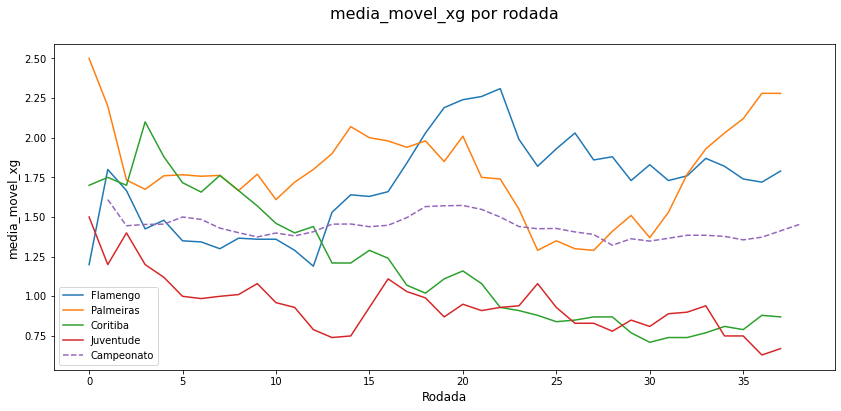

In [27]:
mostrar_serie(medias10, ["Flamengo", "Palmeiras", "Coritiba", "Juventude"], "media_movel_xg")

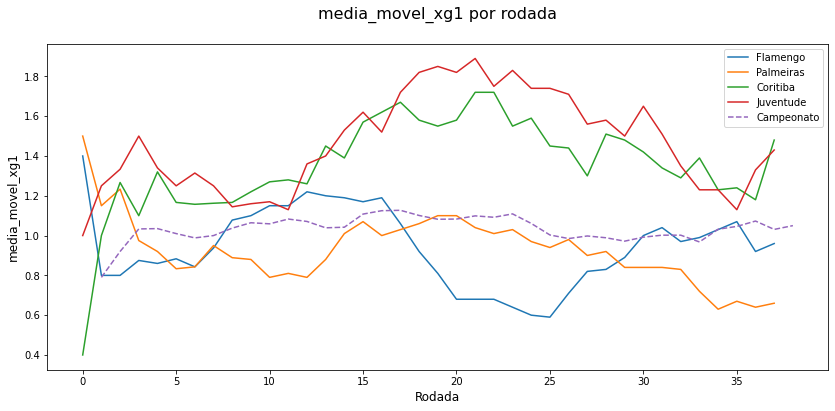

In [28]:
mostrar_serie(medias10, ["Flamengo", "Palmeiras", "Coritiba", "Juventude"], "media_movel_xg1")

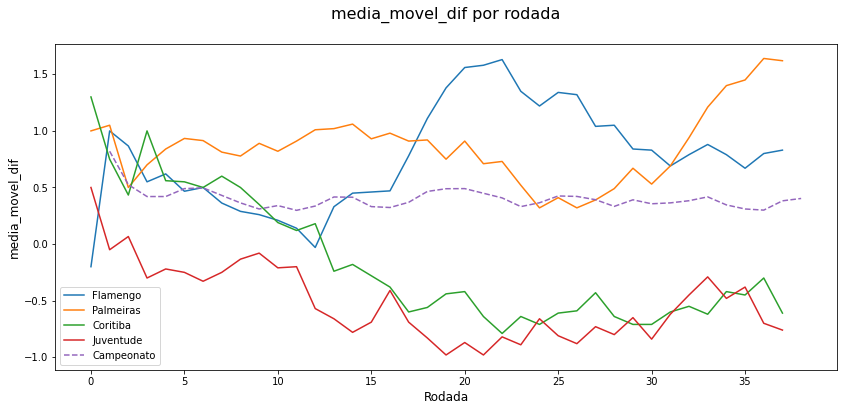

In [29]:
mostrar_serie(medias10, ["Flamengo", "Palmeiras", "Coritiba", "Juventude"], "media_movel_dif")

A principal diferença é que a variação na série de 10 jogos é mais suave, sendo que isso ocorre justamente por considerar mais jogos na geração dos resultados. A janela de 10 jogos parece ser mais ideal para indicar a fase de um time, justamente por considerar um período de tempo maior, em que pega mais jogos para gerar a média. Já a janela de 5 jogos é ideal para considerar o estado do time em um período mais curto de tempo, que pode variar de 2 semanas a um mês dependendo da frequência de jogos.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2022/stats/2022-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios à partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

In [11]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os;
import pathlib
import warnings
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [81]:
df_jogadores = pd.read_csv("stats_ataque.csv")
df_jogadores = df_jogadores[df_jogadores["Min"] > 90]
df_jogadores.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Matches,-9999
0,1,Abner,br BRA,DF,Atl Paranaense,21,2000,28,25,2106,...,0.13,0.04,0.13,0.05,0.09,0.15,0.05,0.15,Matches,7f9c5d2d
1,2,Adryelson,br BRA,DF,Botafogo (RJ),23,1998,17,16,1446,...,0.00,0.00,0.00,0.08,0.02,0.10,0.08,0.10,Matches,e980e78d
2,3,Adson,br BRA,FWMF,Corinthians,21,2000,25,13,1239,...,0.22,0.22,0.22,0.19,0.06,0.25,0.19,0.25,Matches,eda38706
3,4,Airton,br BRA,FW,Atl Goianiense,22,1999,33,22,1738,...,0.31,0.10,0.31,0.19,0.14,0.34,0.19,0.34,Matches,751ef075
4,5,Carlos Alberto,br BRA,FWMF,América (MG),19,2002,6,0,156,...,0.00,0.00,0.00,0.41,0.06,0.47,0.41,0.47,Matches,08f48d96


In [6]:
def extrair_valores(df_, jogador, atributos):
    
    dados_jogador = df_[df_["Player"] == jogador]
    dados_jogador = dados_jogador[atributos]
    
    values = dados_jogador.values[0]
    
    maximos = df_[atributos].max()
    minimos = df_[atributos].min()
    
    percentuais = ((values-minimos)/(maximos-minimos))*100
    
    return values, percentuais

In [7]:
def mostrar_radar_plot(jogador, dados_jogador, parametros):

    valores, percentiles = dados_jogador
    
    #list of names on plots
    slice_colors = ["purple"] * 6
    text_colors = ["white"]*6
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                               "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                             "RobotoSlab%5Bwght%5D.ttf?raw=true"))
    #PIZZA PLOT
    baker = PyPizza(
        params=parametros,
        min_range = None,
        max_range = None,               # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )
    #making pizza for our data
    fig, ax = baker.make_pizza(
        percentiles,              # list of values
        figsize=(10, 10),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=slice_colors, # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(valores[i]))
    # add title
    fig.text(
        0.515, 0.97, jogador, size=18,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Campeonato Brasileiro | Temporada 2022",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )
    plt.show()
    

In [84]:
atributos_atacante = ["xG90", "Gls90", "npxG90", "xG+xAG90", "G+A90", "xG"]
parametros = ["Gols esperados por 90 minutos", "Gols por 90 minutos", "Gols (tirando penalti)\n esperados por 90 minutos",
              "Gols + assistencias esperados por 90 minutos", "Gols + assistencias por 90 minutos", "Gols esperados"]

In [85]:
cano = extrair_valores(df_jogadores, "Germán Cano", atributos_atacante)
hulk = extrair_valores(df_jogadores, "Hulk", atributos_atacante)
pedro_raul = extrair_valores(df_jogadores, "Pedro Raul", atributos_atacante)

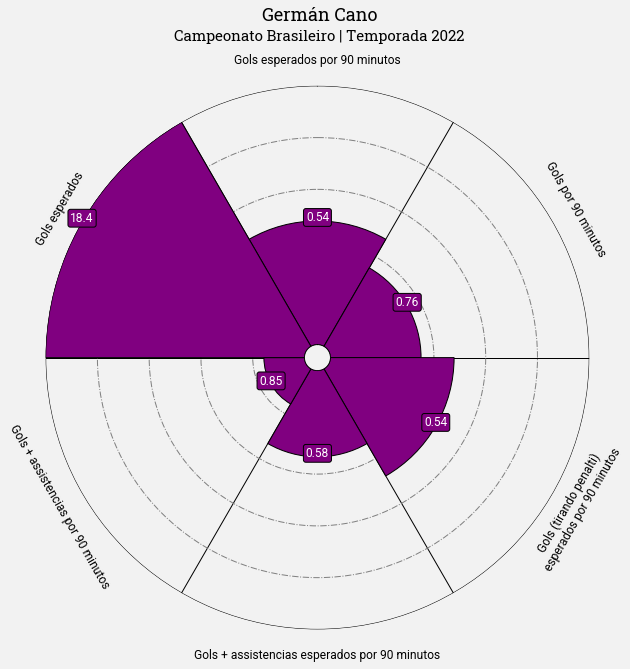

In [86]:
mostrar_radar_plot("Germán Cano", cano, parametros)

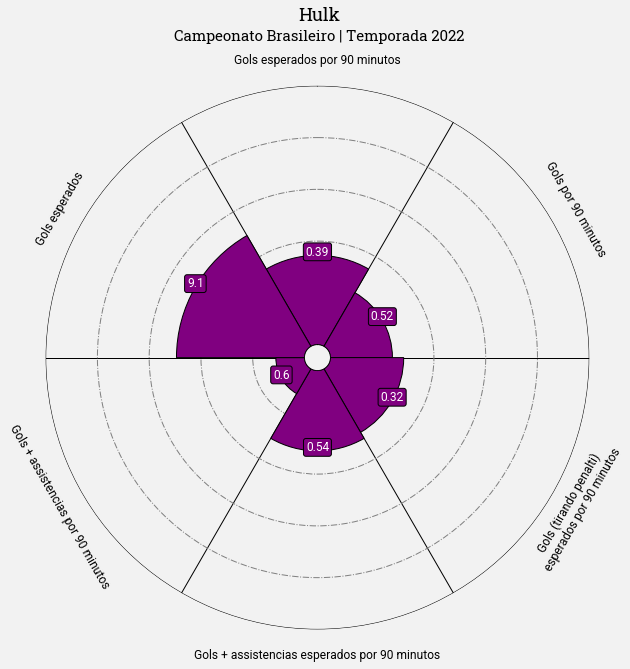

In [87]:
mostrar_radar_plot("Hulk", hulk, parametros)

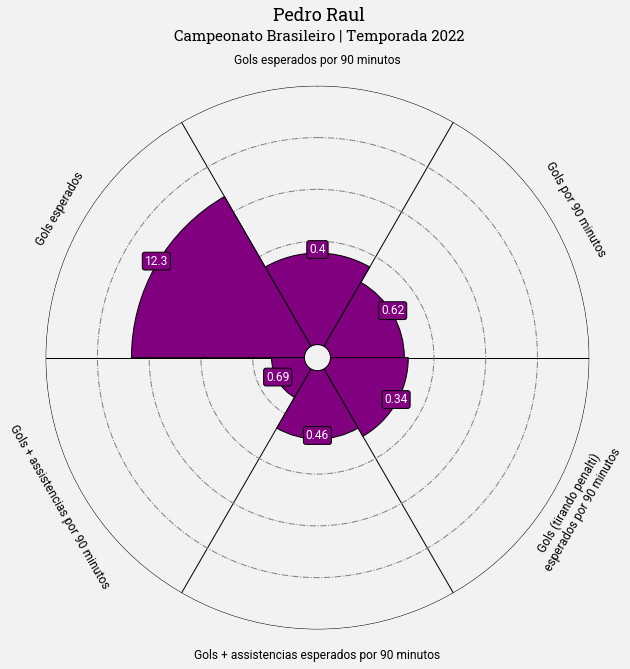

In [88]:
mostrar_radar_plot("Pedro Raul", pedro_raul, parametros)


As características escolhidas são importantes para avaliar atacantes porque fornecem informações sobre sua eficácia na finalização, contribuição ofensiva e capacidade de criação e participação de jogadas que resultam em gols.

"Gols esperados por 90 minutos": é uma métrica usada para calcular a probabilidade de um jogador marcar um gol em um determinado jogo. Isso ajuda a avaliar sua capacidade de finalização.

"Gols por 90 minutos": é uma medida direta da quantidade de gols marcados por um jogador em média a cada 90 minutos de jogo. Isso pode ser usado para avaliar a eficácia do jogador em marcar gols e sua produtividade geral em jogos.

"Gols (tirando pênalti) esperados por 90 minutos": ajuda a avaliar a habilidade do jogador em marcar gols em situações mais desafiadoras.

"Gols + assistências esperados por 90 minutos" é uma medida estatística que combina os dados de gols esperados e assistências esperadas para calcular a probabilidade de um jogador marcar um gol ou dar uma assistência em um determinado jogo. Avalia a capacidade do jogador em criar e finalizar jogadas.

"Gols + assistências por 90 minutos" é uma medida direta da quantidade de gols e assistências que um jogador contribui em média a cada 90 minutos de jogo. Avalia a produtividade geral do jogador em criação e finalização de jogadas.

"Gols esperados" é uma medida estatística que calcula a probabilidade de um jogador marcar um gol em um determinado período de tempo, como uma temporada inteira. Isso pode ser usado para avaliar a consistência do jogador na criação de oportunidades de gol e na finalização ao longo do tempo.

A escala dos radares das questões 3, 4 e 5 foram baseadas no valor máximo e mínimo observados. Assim, se o jogador foi líder em uma característica, seu radar vai ser máximo nela. A normalização foi feita subtraindo o valor mínimo do valor observado e dividindo-se pela sutração do valor mínimo do valor máximo. Só foi considerado jogadores que atuaram por pelo menos 90 minutos durante todo o campeonato.

Os resultados dos radares possibilitam observar um grande destaque para Germán Cano, que foi o craque do Campeonato Brasileiro de 2022, possuindo maior valor de gols esperados por 90 minutos. Pedro Raul e Hulk ficaram um pouco atrás mas também foram muito bem no Campeonato, e percebe-se que os dois ficaram com radares bem próximos para as características avaliadas. Talvez a escolha desses atributos tenha deixado o Hulk com menos destaque, porque nenhum deles considerada o nível de participação do jogador no jogo, sendo que o Hulk é um dos jogadores mais relevantes nessa característica.

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [124]:
df_jogadores_meia = pd.read_csv("stats_meia.csv")

df_jogadores_meia = df_jogadores_meia[df_jogadores_meia["90s"] > 1]
df_jogadores_meia.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,...,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Matches,-9999
0,1,Abner,br BRA,DF,Atl Paranaense,21,2000,23.4,56.0,2.39,...,6.0,0.26,4.0,1.0,0.0,1.0,0.0,0.0,Matches,7f9c5d2d
1,2,Adryelson,br BRA,DF,Botafogo (RJ),23,1998,16.1,11.0,0.68,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches,e980e78d
2,3,Adson,br BRA,FWMF,Corinthians,21,2000,13.8,38.0,2.76,...,1.0,0.07,1.0,0.0,0.0,0.0,0.0,0.0,Matches,eda38706
3,4,Airton,br BRA,FW,Atl Goianiense,22,1999,19.3,64.0,3.26,...,10.0,0.51,5.0,0.0,3.0,0.0,2.0,0.0,Matches,751ef075
4,5,Carlos Alberto,br BRA,FWMF,América (MG),19,2002,1.7,2.0,1.16,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches,08f48d96


In [125]:
atributos_meia = ["GCA90", "SCA90", "TO", "Sh", "PassLive", "SCA"]
parametros = ["Ações criadoras de gol por 90 minutos", "Ações criadoras de chute por 90 minutos", "Investidas que resultaram em \ntentativa de chute",
             "Chutes que criaram outras chances de chute", "Passes que resultaram em chance de chute", "Ações criadoras de chute"]


In [126]:
renato_augusto = extrair_valores(df_jogadores_meia, "Renato Augusto", atributos_meia)
scarpa = extrair_valores(df_jogadores_meia, "Gustavo Scarpa", atributos_meia)
arias = extrair_valores(df_jogadores_meia, "Jhon Arias", atributos_meia)

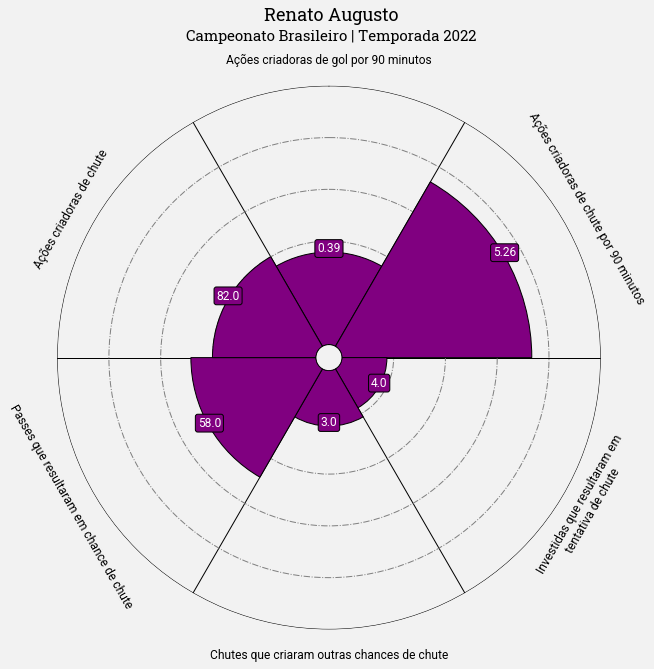

In [127]:
mostrar_radar_plot("Renato Augusto", renato_augusto, parametros)

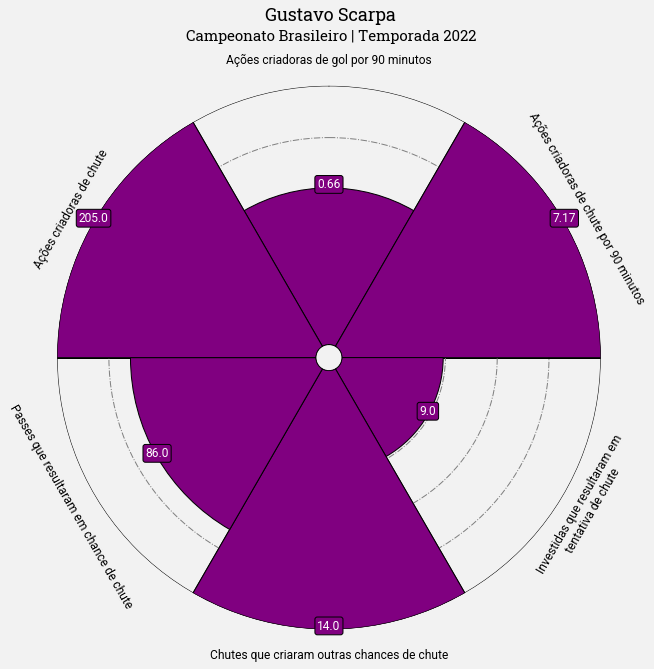

In [128]:
mostrar_radar_plot("Gustavo Scarpa", scarpa, parametros)

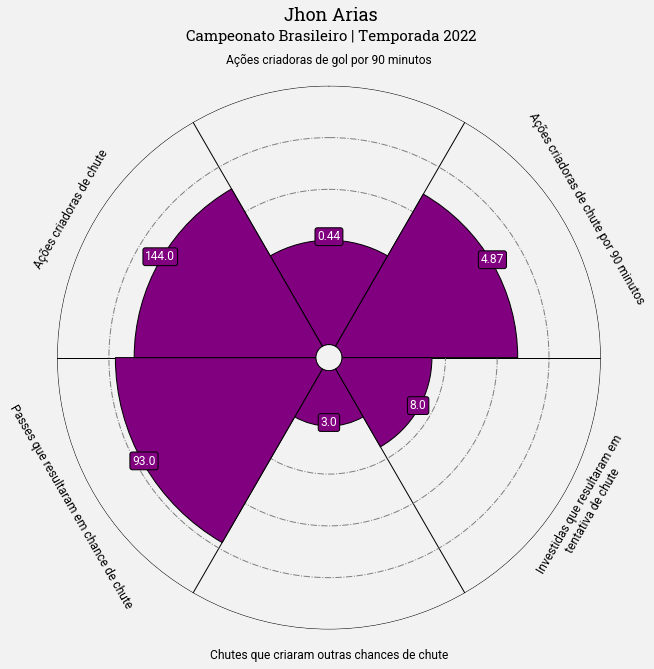

In [129]:
mostrar_radar_plot("Jhon Arias", arias, parametros)

A avaliação de meias deve considerar características relacionadas com a capacidade do jogador de criar jogadas de ataque e gerar oportunidades de gol para seu time.

"Ações criadoras de gol por 90 minutos": usada para medir a habilidade do jogador em gerar jogadas de ataque e criar oportunidades de gol para o seu time.

"Ações criadoras de chute por 90 minutos": avalia a habilidade em criar oportunidades de finalização para seus companheiros de equipe.

"Investidas que resultaram em tentativa de chute": mede o número de vezes que o jogador conseguir avançar com a bola e criar jogadas perigosas no campo adversário.

"Chutes que criaram outras chances de chute": é uma medida direta da capacidade do meia em criar oportunidades de gol para sua equipe, mesmo que seja por meio de rebotes.

"Passes que resultaram em chance de chute": métrica ajuda a avaliar o jogador nos quisitos leitura do jogo e entrega de passes precisos que criam oportunidades de gol.

"Ações criadoras de chute" mede a contribuição geral do jogador no ataque de sua equipe e sua capacidade de criar oportunidades de gol.

Os radares dos jogadores revelam, tal como esperado, grande destaque para Gustavo Scarpa que foi o segundo mais votado para craque do campeonato. Esse jogador conseguiu pontuação máxima em três dessas carcaterísticas. Já Renato Augusto não teve tanto destaque, o que pode estar relacionado a um caráter mais defensivo desse jogador, sendo que o radar considerou mais aspectos de criação de jogadas, do que por exemplo, de desarmes no terço médio do campo. Jhon Arias também teve bastante participaçao em criação de jogadas, sendo um meia bastante relevante para o time do Fluminense

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [2]:
df_jogadores_defesa = pd.read_csv("stats_defesa.csv")

df_jogadores_defesa = df_jogadores_defesa[df_jogadores_defesa["90s"] > 1]
df_jogadores_defesa.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches,-9999
0,1,Abner,br BRA,DF,Atl Paranaense,21,2000,23.4,43.0,28,...,14.0,18.0,3.0,15.0,39,82.0,54.0,0.0,Matches,7f9c5d2d
1,2,Adryelson,br BRA,DF,Botafogo (RJ),23,1998,16.1,17.0,12,...,2.0,18.0,12.0,6.0,22,39.0,99.0,0.0,Matches,e980e78d
2,3,Adson,br BRA,FWMF,Corinthians,21,2000,13.8,34.0,22,...,10.0,18.0,0.0,18.0,13,47.0,11.0,0.0,Matches,eda38706
3,4,Airton,br BRA,FW,Atl Goianiense,22,1999,19.3,32.0,24,...,24.0,17.0,5.0,12.0,10,42.0,12.0,0.0,Matches,751ef075
4,5,Carlos Alberto,br BRA,FWMF,América (MG),19,2002,1.7,1.0,1,...,3.0,2.0,0.0,2.0,4,5.0,0.0,1.0,Matches,08f48d96


In [12]:
atributos_defensor = ["Sh", "Int", "Tkl", "Clr", "Lost", "Def 3rd"]
parametros = ["Chutes bloqueados", "Interceptações", "Número de jogadores desarmados", 
              "Chutes para afastar perigo adversário", "Dribles levados", "Desarmes no terço defensivo"]

In [13]:
gomez = extrair_valores(df_jogadores_defesa, "Gustavo Gómez", atributos_defensor)
manoel = extrair_valores(df_jogadores_defesa, "Manoel", atributos_defensor)
david_luiz = extrair_valores(df_jogadores_defesa, "David Luiz", atributos_defensor)

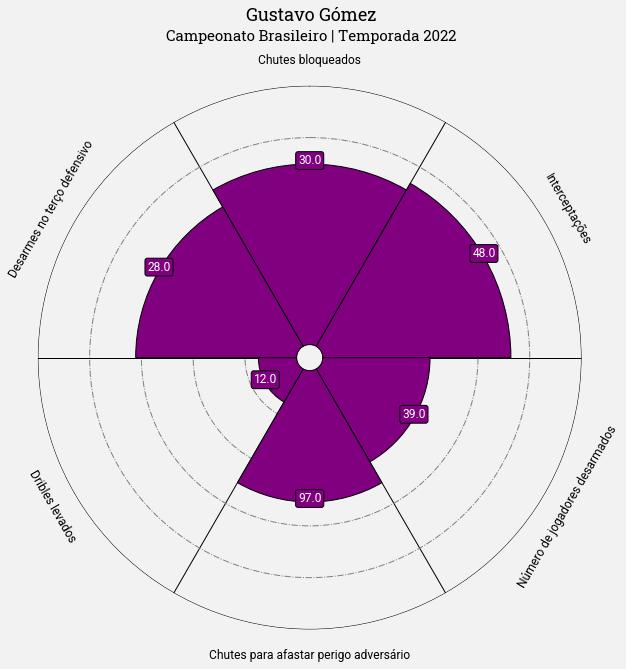

In [14]:
mostrar_radar_plot("Gustavo Gómez", gomez, parametros)

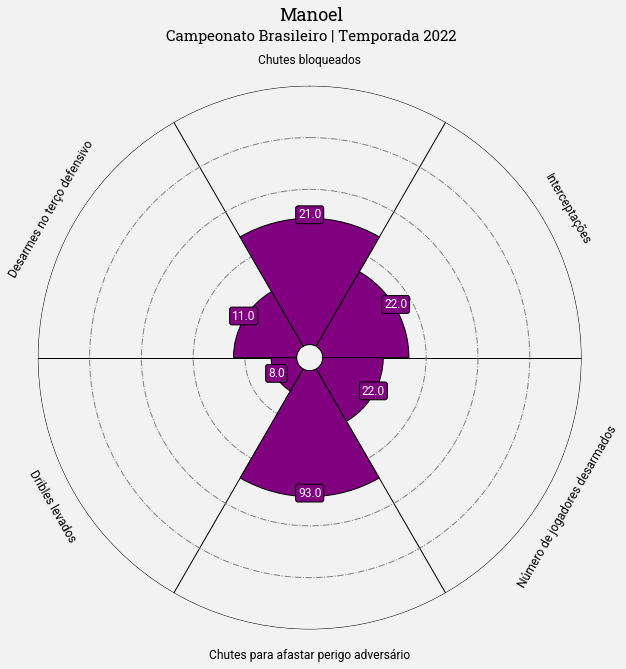

In [15]:
mostrar_radar_plot("Manoel", manoel, parametros)

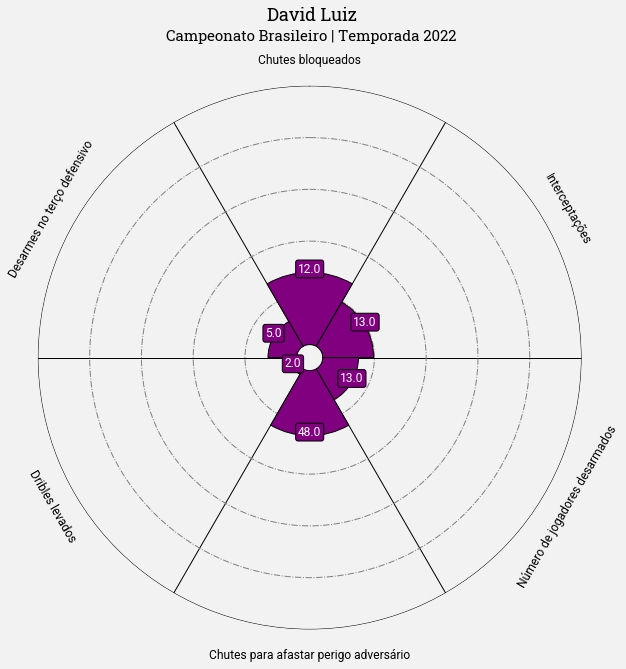

In [16]:
mostrar_radar_plot("David Luiz", david_luiz, parametros)

As caractéristicas consideradas para defensores ajudam a avaliar sua habilidade para impedir progresso do time adversário, afastar perigos e evitar chutes.

"Chutes bloqueados": avalia a habilidade do zagueiro em se posicionar bem e se antecipar ao movimento do atacante.

"Interceptações": interceptar passes de jogadores adversários ajuda na avaliação da atenção e leitura de jogo por parte do zagueiro

"Número de jogadores desarmados": esse medida ajuda a medir a habilidade do zagueiro em enfrentar jogadores adversários individualmente e em situações de um contra um.

"Chutes para afastar perigo adversário": habilidade do zagueiro em proteger a sua equipe de conceder gols em situações de perigo.

"Dribles levados": medida direta da capacidade do zagueiro em evitar ser driblado por jogadores adversários.

"Desarmes no terço defensivo": mede a capacidade do zagueiro em desarmar jogadores adversários no terço defensivo do campo. Está relacionada a proteger a sua equipe em áreas próximas ao gol.

O zagueiro Gustavo Gómez, além de ser muito participativo e ter boas métricas na maioria dessas características, marcou 9 gols no campeonato. Já manoel foi um zagueiro intermediário que possui destaque em bloqueios e chutes para afastar perigo. Por fim, David Luiz ficou bem abaixo do esperado para um zagueiro que já foi titular da Seleção Brasileira, tendo poucas participações e destaque nas métricas avaliadas.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

As principais diferenças entre os atributos relevantes para cada posição são que os atacantes se concentram em marcar e criar oportunidades de gol, enquanto os meias em criar jogadas de ataque e oportunidades de chute e os zagueiros em impedir os ataques adversários, seja por meio de bloqueios, interceptações ou desarmes. 

As principais semelhanças se referem ao fato de que todas as posições têm atributos que refletem sua capacidade de conduzir a bola e leitura de jogo. Dessa forma, essas características estão associadas a habilidade geral do jogador em executar suas funções no campo e contribuir para o sucesso de sua equipe.

A impressão subjetiva que eu tinha de certa forma se comprovou pelos radares, pois eles apontaram bastante destaque para Germán Cano, Gustavo Scarpa e Gustavo Gómez, sendo que esses foram alguns dos jogadores mais relevantes em suas respectivas posições no Campeonato Brasileiro de 2022.

A posição mais difícil a ser avaliada por estatísticas parece ser a de zagueiro, pois as métricas são bem variadas e frequentemente podem não refletir muito bem o nível de atuação do jogador. Por exemplo, um jogo em que os adversários pouco atacaram teria a tendência de ter baixo número de participações defensivas para os zagueiros, sendo que com isso, alguém poderia pensar que houve uma má atuação por parte deles.